In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from spectrum import get_spec, plot_spec, grid_specs

In [2]:
broad = ['u', 'g', 'r', 'i', 'z']
broad_colors = ['#CD00CD', '#00C0FF', '#FF6300', '#D20000', '#AA0000']
broad_dict = dict(zip(broad, broad_colors))
narrow = ['J0378', 'J0395', 'J0410', 'J0430', 'J0515', 'J0660', 'J0861']
narrow_colors = ['#610061', '#8000A1', '#7E00DB', '#3D00FF', '#1FFF00', '#FF0000', '#610000']
narrow_dict = dict(zip(narrow, narrow_colors))
filters_dict = broad_dict | narrow_dict

lines = ['H_alpha', 'H_beta', 'H_gamma', 'Mg_II 2799', 'C_III] 1908',
         'He_II 1640', 'C_IV 1549', 'N_V 1240', 'Ly_alpha']
plt_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
lines_dict = dict(zip(lines, plt_colors))

In [3]:
df = pd.read_csv('example.csv')

### Single spectrum

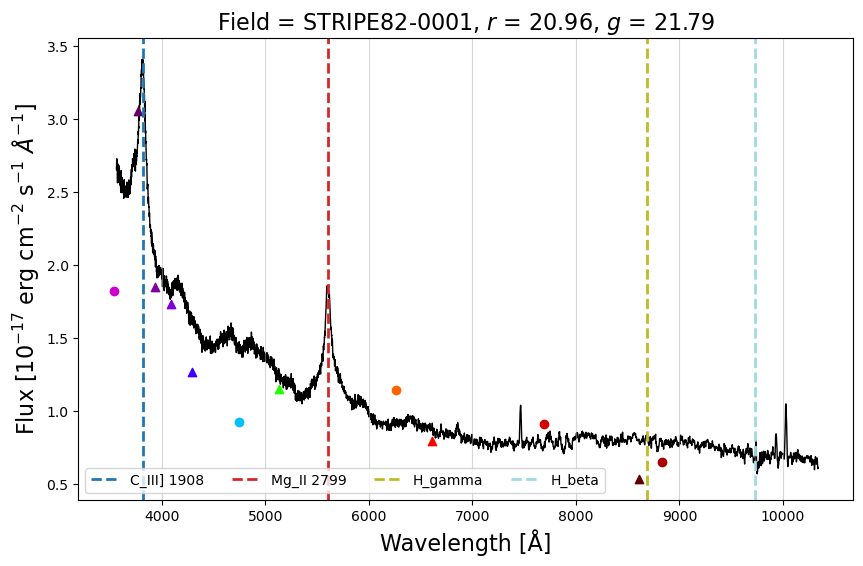

In [4]:
ix = 99
spec = get_spec(df.loc[ix, 'PLATE'], df.loc[ix, 'MJD'], df.loc[ix, 'FIBERID'])

fig, ax = plt.subplots(figsize=(10, 6))

plot_spec(ax=ax,  # ax to plot
          df=df.loc[ix],  # row of the dataframe corresponding to the spectrum (important!!)
          spec=spec,  # spectrum dict
          lines=lines,  # which lines to plot
          SED=True,  # plot SED
          transm_curve={},  # don't plot transmission curve
          legend_cols={
              'Field': 'Field',
              'r_PStotal': '$r$',
              'g_PStotal': '$g$'
              },  # specific legend columns
          )

ax.set_xlabel('Wavelength [Å]', size=16)
ax.set_ylabel('Flux [$10^{-17}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]', size=16)
plt.show()

### Grid of spectra

No spectrum found for plate=7850, mjd=56956, fiberID=810.


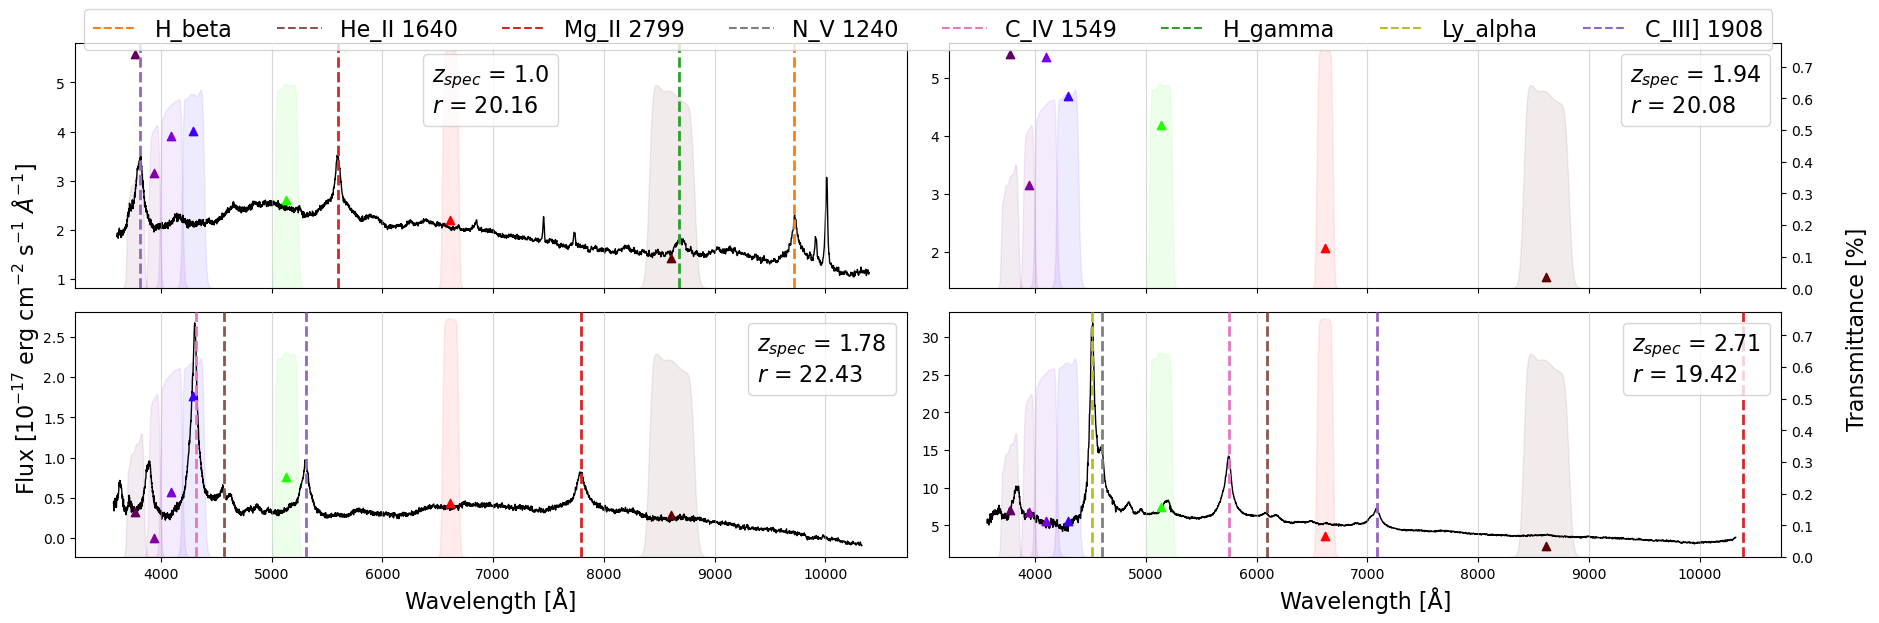

In [5]:
grid_specs(
    df=df,  # DataFrame with all objects
    df_idx=[22, 23, 24, 25],  # specific indices to plot
    lines=lines_dict,  # which lines to plot
    SED=True,  # plot SED
    transm_curve=narrow_dict,  # only narrow bands for SED and transmission curve
    legend_cols=None  # default legend columns
    )